# Creating an OLS function in Python

## Linear Algebra in _numpy_

We reviewed chapter 7 to understand how to generate an inverse matrix.

To transform matrix $X$ into $X^{-1}$. To do so, we must transform $[XI]$ into $[IX^{-1}]$. This is accomplished in chapter 7 of the text book. We are going to check the result using _numpy_.

In [1]:
# Numpy | Linear Algebra
# The Linear Algebra module of NumPy offers various methods to apply linear algebra on any numpy array.
# One can find:

# rank, determinant, trace, etc. of an array.
# eigen values of matrices
# matrix and vector products (dot, inner, outer,etc. product), matrix exponentiation
# solve linear or tensor equations and much more!

In [2]:
# background knowledge about matrix from textbook chapter 7

Having built statistics functions, we are now ready to build a function for regression analysis. We will start by building the an regression. We will use linear algebra to estimate parameters that minimize the sum of the squared errors. This is an ordinary least squares regression. 

An OLS regression with one exogenous variable takes the form. 

$y = \alpha + \beta_1x_1 + \mu $

$\beta_0 = \alpha + \mu$

We merge the error term, which represents bias in the data, with alpha to yield the constant, $\beta_0$. This is necessary since OLS assumes an unbiased estimator where:

$\sum_{i=0}^{n-1} e_{i}=0$

Each estimate of a point created from a particular observation takes the form.

$y_i = \beta_0 + \beta_1x_{1,i} + e_i$

This can be generalized to include k exogenous variables:

$y_i = \beta_0 + (\sum_{j=1}^{k} \beta_jx_{i,j}) + e_i$

Ideally, we want to form a prediction where, on average, the right-hand side of the equation  yields the correct value on the left-hand side. When we perform an OLS regression, we form a predictor that minimizes the sum of the distance between each predicted value and the observed value drawn from the data. For example, if the prediction for a particular value of y is 8, and the actual value is 10, the error of the prediction is -2 and the squared error is 4.

To find the function that minimizes the sum squared errors, we will use matrix algebra, also known as linear algebra. For those unfamiliar, the next section uses the numpy library to perform matrix operations. For clarity, we will review the linear algebra functions that we will use with simple examples.

## Linear Algebra for OLS

We solve the following function for a vector of beta values ($\beta$), constants whose values represent estimates of the effect of variables in the set **_X_** on the selected endogenously generate variable $y$. The matrix **_X_** also includes a vector of ones used to estimate the constant $\beta_0$.

$\beta = (X'X)^{-1}X'Y$

$Y =$ Observations for Endogenous Variable

$X =$ Observations for Exogenous Variables

$X' =$ $X$-transpose

$(X'X)^{-1} =$ Inverse of $X'X$

### Inverting a Matrix

In reviewing the linear equation for estimating $\beta$, we confront two unique operations worth understanding. Included in these are some key concepts in linear algebra, including the identity matrix $I$ and linear independence. The best way to understand these concepts is by working with some sample vectors. Consider the matrix $X$ consisting of vectors $x_0$,$x_1$,…,$x_{n-1}$,$x_n$. We must check that these vectors are linearly independent. We do this by joining $X$ with an identity matrix and thus create:

$A = [XI]$

We transform this to show that the product of $A$ and $X^{-1}$ is equal to the product of and an identity matrix, $I$ and $X^{-1}$

$AX^{-1} = [XI]X^{-1}$

$AX^{-1} = [IX^{-1}]$

Let us solve for $AX^{-1}$ using the following vectors for $X$. 

$\begin{equation*}
X = \begin{bmatrix}
1 & 2 & 1 \\
4 & 1 & 5 \\
6 & 8 & 6
\end{bmatrix}
\end{equation*}$

Concatenate a 3 X 3 identity matrix on the left of $X$:

$\begin{equation*}
I = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
[XI] = \begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
4 & 1 & 5 & 0 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$

If we perform row operations on $A$ to transform $X$ in $[XI]$ into $I$, then we $I$ will be transformed into $X^{-1}$:

$\begin{equation*}
[XI] = \begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
4 & 1 & 5 & 0 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$




$\begin{equation*}
r_2 - 4r_1:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -7 & 1 & -4 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$


$\begin{equation*}
r_3 - 6r_1:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -7 & 1 & -4 & 1 & 0 \\
0 & -4 & 0 & -6 & 0 & 1
\end{bmatrix}
\end{equation*}$


$\begin{equation*}
r_2 \leftrightarrow r_3:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -4 & 0 & -6 & 0 & 1\\
0 & -7 & 1 & -4 & 1 & 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_2/{-4}:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & -7 & 1 & -4 & 1 & 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_3 + 7r_2:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & 0 & 1 & 13/2 & 1 & -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_1 + -2r_2 - r_3:\begin{bmatrix}
1 & 0 & 0 & -17/2 & -1 & 9/4 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & 0 & 1 & 13/2 & 1 & -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
IX^{-1}=\begin{bmatrix}
1 & 0 & 0 & -8.5 & -1 & 2.25 \\
0 & 1 & 0 & 1.5 & 0 & -0.25\\
0 & 0 & 1 & 6.5 & 1 & -1.75 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
X^{-1}=\begin{bmatrix}
-8.5 & -1 & 2.25 \\
1.5 & 0 & -0.25\\
6.5 & 1 & -1.75 
\end{bmatrix}
\end{equation*}$

By transforming $X$ in matrix $XI$ into an identity matrix, we transform the $I$ matrix into $X^{-1}$. This also confirms that the vectors comprising X are independent, meaning that one vector in the set comprising $X$ cannot be formed from the combination and or transformation of the others. A fundamental assumption of regression analysis is that data generated from factors believed to determine the y-values are independent of one another.

### Linear Algebra in _numpy_
We can check this using linear algebra functions in numpy. We start by creating numpy arrays that we will transform into vectors in the second step. 

In [3]:
#invertMatrix.py
import numpy as np
# create array to be transformed into vectors
x1 = np.array([1,2,1])
x2 = np.array([4,1,5])
x3 = np.array([6,8,6])
print("Array 1:", x1, sep="\n")
print("Array 2:", x2, sep="\n")
print("Array 3:", x3, sep="\n")

Array 1:
[1 2 1]
Array 2:
[4 1 5]
Array 3:
[6 8 6]


In [4]:
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)
print("Vector 1", x1, sep = "\n")
print("Vector 2", x2, sep = "\n")
print("Vector 3", x3, sep = "\n")

Vector 1
[[1 2 1]]
Vector 2
[[4 1 5]]
Vector 3
[[6 8 6]]


Join x1, x2, and x3 using _np.concatenate()_. We define _axis = 0_ so that the rows are stacked vertically, not  horizontally.

In [5]:
X = np.concatenate((x1, x2, x3), axis = 0)
print("X:", X, sep = "\n")

X:
[[1 2 1]
 [4 1 5]
 [6 8 6]]


Now that we have defined our $X$ matrix, we can generate $X^{-1}$ by using _X.getI()_

In [6]:
X_inverse = X.getI()
print("X Inverse:", X_inverse, sep = "\n")

X Inverse:
[[-8.5000000e+00 -1.0000000e+00  2.2500000e+00]
 [ 1.5000000e+00 -7.6861594e-17 -2.5000000e-01]
 [ 6.5000000e+00  1.0000000e+00 -1.7500000e+00]]


Next, use _np.round()_ to clearly present variables that include digits to the nth place (17).

In [7]:
X_inverse = np.round(X.getI(), 2)
print("X Inverse:", X_inverse, sep = "\n")

X Inverse:
[[-8.5  -1.    2.25]
 [ 1.5  -0.   -0.25]
 [ 6.5   1.   -1.75]]


In [8]:

# Finally, we should also see how to generate the transpose of a matrix. 
# The transpose switches the index values $i$ and $j$. 
# In otherwords, switch the row indexes with the column indexes.

In [9]:
print("X:", X, sep = "\n")
X_transpose = X.getT()
print("X Transpose:", X_transpose, sep = "\n")

X:
[[1 2 1]
 [4 1 5]
 [6 8 6]]
X Transpose:
[[1 4 6]
 [2 1 8]
 [1 5 6]]


## Diversion on Classes in Python

In [10]:
# Create a sample class that contains math functions.
class Arithmetic:
    def __init__(self, val):
        self.name = "arithmetic"
        self.val = val
    def add(self, *args):
        total = 0
        try:
            for arg in args:
                total += arg
                
            return total
        except:
            ("pass list or tuple of ints or floats to add()")

    def multiply(self, *args):
        product = 1
        try:
            for arg in args: 
                product *= arg
            return product
        except:
            print("pass only int or float to multiply")
        

In [11]:
arithmetic = Arithmetic(3)
print(arithmetic)
print(arithmetic.add(1,2,3,4))
print(arithmetic.multiply(1,2,3,4))
print(arithmetic.name)
print(arithmetic.val)
print(arithmetic.__dict__)

10
24
arithmetic
3
{'name': 'arithmetic', 'val': 3}


## Building an OLS Regression Function

$\beta = (X'X)^{-1}X'Y$

An OLS regression posits a relationship between a dependent variable, $Y$, and independent variables - each $x_i$ - contained in $X$.

In [12]:
#econFreedomRegression.py
import pandas as pd

data = pd.read_csv("cleanedEconFreedomData.csv", 
    index_col = "Country Name")
data

,World Rank,Region Rank,2017 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,163.0,40.0,48.885716,12.600000,28.400000,27.500000,91.577500,79.877254,97.338404,54.2,...,27.106,32.0,62.3,1.5,5.4,1947.0,9.6,-1.5,58.0,6.8
Albania,65.0,30.0,64.353003,54.013250,28.473312,39.707367,86.890400,72.499704,51.540942,79.3,...,30.038,2.8,32.7,2.6,1.9,11300.8,17.3,1.9,1003.3,71.9
Algeria,172.0,14.0,46.528581,38.200000,29.631083,31.700000,81.091100,50.955175,19.847749,62.1,...,44.444,39.5,578.7,3.7,3.3,14503.9,10.5,4.8,-587.3,8.7
Angola,165.0,41.0,48.515521,36.400000,19.800000,12.800000,87.687500,58.649804,70.743538,58.5,...,28.926,25.1,184.4,3.0,4.7,7343.8,7.6,10.3,8680.9,62.3
Argentina,156.0,26.0,50.409088,32.449712,39.580063,38.193866,62.611900,54.638703,56.411450,57.3,...,43.947,42.4,972.0,1.2,2.7,22553.6,6.7,26.5,11654.9,56.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,179.0,32.0,26.961476,6.762875,10.256410,11.590788,72.511900,51.537290,15.241804,39.7,...,41.032,30.9,515.7,-5.7,0.3,16672.7,8.0,121.7,1591.0,48.8
Vietnam,147.0,35.0,52.437551,49.711775,32.025118,24.648981,79.597600,74.647472,21.108705,61.2,...,28.665,91.6,552.3,6.7,5.9,6024.4,2.1,0.6,11800.0,59.3
Zambia,122.0,23.0,55.799426,49.618581,39.841706,35.001645,73.105211,81.607282,21.571985,66.6,...,25.570,15.5,62.7,3.6,5.4,3868.1,10.7,10.1,1653.0,52.9


In [13]:
# create rhw regression py file, first to do this using spyder and then copy and paste here. 

In [14]:
#regression.py
import pandas as pd
import numpy as np
import copy
from stats import *
from scipy.stats import t, f

class Regression:
    def __init__(self):
        self.stats = Stats()
        self.reg_history = {}
    def OLS(self, reg_name, data, y_name, beta_names, min_val = 0,
            max_val = None, constant = True):
        # min_val and max_val set index range by index number
        self.min_val = min_val
        if max_val != None:
            self.max_val = max_val
        else:
            self.max_val = len(data)
        self.reg_name = reg_name
        # enodogenous variable name
        self.y_name = y_name
        # names of X variables
        self.beta_names = copy.copy(beta_names)
        #make a copy of the data that is passed to OLS
        self.data = data.copy()
        # if the OLS regression has a constant, add column of 1s to data
        if constant:
            self.add_constant()
        self.build_matrices() 
        self.estimate_betas_and_yhat()
        self.calculate_regression_stats()
        self.save_output()
    def add_constant(self):
        self.data["Constant"] = 1
        self.beta_names.append("Constant")
    
    def build_matrices(self):
        # Transform dataframews to matrices
        self.y = np.matrix(self.data[self.y_name][self.min_val:self.max_val])
        # create a k X n nested list containing vectors for each exogenous var
        self.X = np.matrix(self.data[self.beta_names])
        self.X_transpose = np.matrix(self.X).getT()
        # (X'X)**-1
        X_transp_X = np.matmul(self.X_transpose, self.X)
        self.X_transp_X_inv = X_transp_X.getI()
        # X'y
        self.X_transp_y = np.matmul(self.X_transpose, self.y)
        
    def estimate_betas_and_yhat(self):
        # betas = (X'X)**-1 * X'y
        self.betas = np.matmul(self.X_transp_X_inv, self.X_transp_y)
        # y_hat = X * betas
        self.y_hat = np.matmul(self.X, self.betas)
        # Create a column that hold y-hat values
        #.item(n) pulls nth value from matrix
        self.data[self.y_name[0] + " estimator"] = \
            [i.item(0) for i in self.y_hat]
        # create a table that holds the estimated coefficient
        # this will also be used to store SEs, t-stats, and p-values
        self.estimates = pd.DataFrame(self.betas, index = self.beta_names,
                                      columns = ["Coefficient"])
        # identify y variable in index
        self.estimates.index.name = "y = " + self.y_name[0]        
        
    def calculate_regression_stats(self):
        self.sum_square_stats()
        self.calculate_degrees_of_freedom()
        self.calculate_estimator_variance()
        self.calculate_covariance_matrix()
        self.calculate_t_p_error_stats()
        self.calculate_MSE()
        self.calculate_rsquared()
        self.calculate_fstat()
        self.build_stats_DF()
        
    def sum_square_stats(self):
        ssr_list = []
        sse_list = []
        sst_list = []
        mean_y = self.stats.mean(self.y).item(0)
        for i in range(len(self.y)):
            # ssr is sum of squared distances between the estimated y values
            # (y-hat) and the average of y values (y-bar)
            yhat_i = self.y_hat[i]
            y_i = self.y[i]
            r = yhat_i - mean_y
            e = y_i - yhat_i
            t = y_i - mean_y
            ssr_list.append((r) ** 2)
            sse_list.append((e) ** 2)
            sst_list.append((t) ** 2)
            
        # call item - call value instead of matrix
        self.ssr = self.stats.total(ssr_list).item(0)
        self.sse = self.stats.total(sse_list).item(0)
        self.sst = self.stats.total(sst_list).item(0)
        
    def calculate_degrees_of_freedom(self):
        # Degrees of freedom compares the number of observations to the number
        # of exogenous variables used to form the prediction
        self.lost_degrees_of_freedom = len(self.estimates)
        self.num_obs = self.max_val + 1 - self.min_val
        self.degrees_of_freedom = self.num_obs - self.lost_degrees_of_freedom
        
    def calculate_estimator_variance(self):
#        estimator variance is the sse normalized by the degrees of freedom
        # thus, estimator variance increases as the number of exogenous
        # variables used in estimation increases(i.e., as degrees of freedom 
        # fall)
        self.estimator_variance = self.sse / self.degrees_of_freedom
        
    def calculate_covariance_matrix(self):
        # Covariance matrix will be used to estimate standard errors for
        # each coefficient.
        # estimator variance * (X'X)**-1
        self.cov_matrix = float(self.estimator_variance) * self.X_transp_X_inv
        self.cov_matrix = pd.DataFrame(self.cov_matrix,
                                       columns = self.beta_names,
                                       index = self.beta_names)

    def calculate_t_p_error_stats(self):
        ratings = [.05, .01, .001]
        results = self.estimates
        stat_sig_names = ["SE", "t-stat", "p-value"]
        # create space in data frame for SE, t, and p
        for stat_name in stat_sig_names:
            results[stat_name] = np.nan
        # generate statistic for each variable
        for var in self.beta_names:
            # SE ** 2 of coefficient is found in the diagonal of cov_matrix
            results.loc[var]["SE"] = self.cov_matrix[var][var] ** (1/2)
            
            # t-stat = Coef / SE
            results.loc[var]["t-stat"] = \
                results["Coefficient"][var] / results["SE"][var]
            # p-values is estimated using a table that transforms t-value in 
            # light of degrees of freedom
            results.loc[var]["p-value"] = np.round(t.sf(np.abs(results.\
                       loc[var]["t-stat"]), self.degrees_of_freedom + 1) * 2, 5)
        # values for significances will be blank unless p-values < .05
        # pandas does not allow np.nan values or default blank strings to 
        # be replaced x-post
        significance = ["" for i in range(len(self.beta_names))]
        for i in range(len(self.beta_names)):
            var = self.beta_names[i]
            for val in ratings:
                if results.loc[var]["p-value"] < val:
                    significance[i] = significance[i]  + "*"
        results["signficance"] = significance
        
    def calculate_MSE(self):
        self.mse = self.estimator_variance ** (1/2)
    
    def calculate_rsquared(self):
        self.r_sq = self.ssr / self.sst
        self.adj_r_sq = 1 - self.sse / self.degrees_of_freedom / (self.sst \
                            / (self.num_obs - 1))
        
    def calculate_fstat(self):
        self.f_stat = (self.sst - self.sse) / (self.lost_degrees_of_freedom\
                      - 1) / self.estimator_variance
        
    def build_stats_DF(self):
        stats_dict = {"r**2": [self.r_sq],
                      "Adj. r**2": [self.adj_r_sq],
                      "f-stat":[self.f_stat],
                      "Est Var":[self.estimator_variance],
                      "MSE":[self.mse],
                      "SSE":[self.sse],
                      "SSR":[self.ssr],
                      "SST":[self.sst],
                      "Obs.":[int(self.num_obs)],
                      "DOF":[int(self.degrees_of_freedom)]}
        self.stats_DF = pd.DataFrame(stats_dict)
        self.stats_DF = self.stats_DF.rename(index={0:"Estimation Statistics"})
        self.stats_DF = self.stats_DF.T
        
    def save_output(self):
        self.reg_history[self.reg_name] = {"Reg Stats": self.stats_DF.copy(),
                        "Estimates": self.estimates.copy(),
                        "Cov Matrix":self.cov_matrix.copy()}

In [15]:
from regression import Regression
reg = Regression()
print(reg)

You created an instance of Stats


In [16]:
# this is the dependent variabls 
y_var = ["GDP per Capita (PPP)"] 
# this is the independent variables 
x_vars = ["Trade Freedom", "Property Rights", "Inflation (%)",
          "Public Debt (% of GDP)"]

reg.OLS("GDP per Capita", data, y_var, x_vars)

In [17]:
reg.betas

matrix([[    60.47038974],
        [   805.63685839],
        [   215.42709103],
        [   -89.6204527 ],
        [-24027.12022385]])

In [18]:
# obtain the estimates and the significance of variables 
reg.estimates

,Coefficient,SE,t-stat,p-value,signficance
y = GDP per Capita (PPP),,,,,
Trade Freedom,60.470390,157.893803,0.382981,0.70221,
Property Rights,805.636858,87.701595,9.186114,0.00000,***
Inflation (%),215.427091,117.099319,1.839696,0.06757,
Public Debt (% of GDP),-89.620453,36.223432,-2.474102,0.01434,*
Constant,-24027.120224,9960.453748,-2.412252,0.01692,*


In [19]:
# now consider about the sum squared statistics ssr, see, and sst to caculate goodness of fit for all the variables 

We have calculated beta values for each independent variable, meaning that we estimated the average effect of a change in each independent variable upon the dependent variable. While this is useful, we have not yet measured the statistical significance of these estimations; neither have we determined the explanatory power of our particular regression.

Our regression has estimated predicted values for our dependent variable given the values of the independent variables for each observation. Together, these estimations for an array of predicted values that we will refer to as $y ̂ $. We will refer to individual predicted values as ($y_i$) ̂. We will also refer to the mean value of observations of our dependent variable as $y ̅ $ and individual observed values of our dependent variable as $y_i$. These values will be use to estimate the sum of squares due to regression ($SSR$), sum of squared errors ($SSE$), and the total sum of squares ($SST$). By comparing the estimated $y$ values, the observed $y$ values, and the mean of $y$, we will estimate the standard error for each coefficient and other values that estimate convey the significance of the estimation.

We define these values as follows:

$SSR = \sum_{i=0}^{n} (y ̂ _{i} - y ̅ )^2$

$SSE = \sum_{i=0}^{n} (y_{i} - y ̂ _{i})^2$

$SST = \sum_{i=0}^{n} (y_{i} - y ̅ _{i})^2$

It happens that the sum of the squared distances between the estimated values and mean of observed values and the squared distances between the observed and estimated values add up to the sum of the squared distances between the observed values and the mean of observed values. We indicate this as:

$SST = SSR + SSE$

The script below will estimate these statistics. It calls the sum_square_stats method from the which is passed in the calculate_regression_stats method.

In [20]:
reg.ssr, reg.sse, reg.sst

(40627979241.38482, 39504107666.815506, 80132086908.20023)

In [21]:
# check the covariance matrix which shows the covariance between each variable.
reg.cov_matrix

,Trade Freedom,Property Rights,Inflation (%),Public Debt (% of GDP),Constant
Trade Freedom,2.493045e+04,-9428.587294,-7.911424,746.819189,-1.441626e+06
Property Rights,-9.428587e+03,7691.569780,2454.380917,-710.288113,3.368646e+05
Inflation (%),-7.911424e+00,2454.380917,13712.250604,-100.255941,-1.836721e+05
Public Debt (% of GDP),7.468192e+02,-710.288113,-100.255941,1312.137019,-8.981082e+04
Constant,-1.441626e+06,336864.584639,-183672.106930,-89810.818777,9.921064e+07


In [22]:
# save cov matrix as a csv file
reg.cov_matrix.to_csv("regCovMatrix.csv")
reg.cov_matrix

,Trade Freedom,Property Rights,Inflation (%),Public Debt (% of GDP),Constant
Trade Freedom,2.493045e+04,-9428.587294,-7.911424,746.819189,-1.441626e+06
Property Rights,-9.428587e+03,7691.569780,2454.380917,-710.288113,3.368646e+05
Inflation (%),-7.911424e+00,2454.380917,13712.250604,-100.255941,-1.836721e+05
Public Debt (% of GDP),7.468192e+02,-710.288113,-100.255941,1312.137019,-8.981082e+04
Constant,-1.441626e+06,336864.584639,-183672.106930,-89810.818777,9.921064e+07


Next we will use the statistics that we have calculated to build the mean squared error (MSE), the square root of the mean squared error, R2, and F-stat.

The variance term will be used to help us calculate other values. First we estimate the square root of the mean squared error. Since the mean squared error is the variance of the estimator, this means we simply take the square root the variance term

$rootMSE = \sqrt{\sigma^2}$

The square-root of the MSE provides a more readily interpretable estimate of the estimator variance, showing the average distance of predicted values from actual values, corrected for the number of independent variables.

We also estimate the R2 value. This value indicates the explanator power of the regression

$R^2 = \frac{SSR}{SST}$

This compares the average squared distance between the predicted values and the average value against the average squared distance between observed values and average values. Ordinary least squares regression minimizes the squared distance between the predicted value and the average value. If values are perfectly predicted, then the SSR would equal the SST. Usually, the SSR is less than the SST. It will never be greater than the SST.

Finally we calculate the F-statistic, commonly referred to as the F-stat:

$ F =\frac{\frac{SST - SSE}{K - 1}}{\frac{SSE}{N - K}}$

The F-statistic tests the likelihood of whether or not the values of our estimated parameters are all zero:

$\beta_1 = \beta_2 = . . . = \beta_{n-1} = \beta_n$

We check the difference between the SST and SSE divided by the number of independent variables used in the regression less one. We divide this value by the mean squared error.

In [23]:
# look at the different statistics we caculated earlier using the regress functions 
reg.stats_DF.to_csv("regStatistics.csv")
reg.stats_DF

,Estimation Statistics
r**2,5.070126e-01
Adj. r**2,4.952748e-01
f-stat,4.319488e+01
Est Var,2.351435e+08
MSE,1.533439e+04
SSE,3.950411e+10
SSR,4.062798e+10
SST,8.013209e+10
Obs.,1.730000e+02
DOF,1.680000e+02


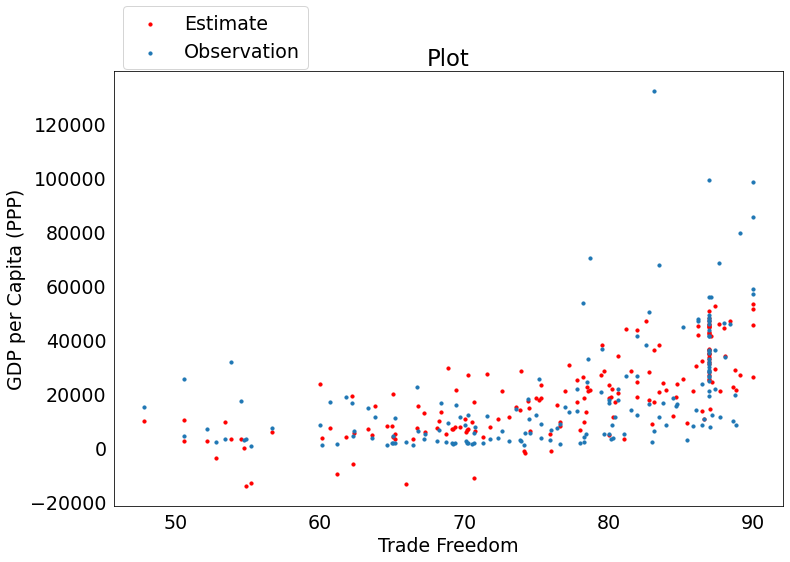

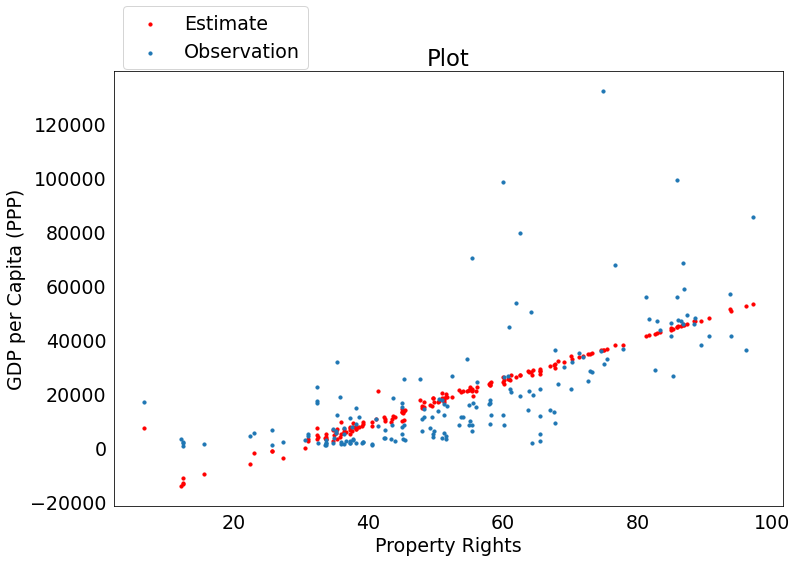

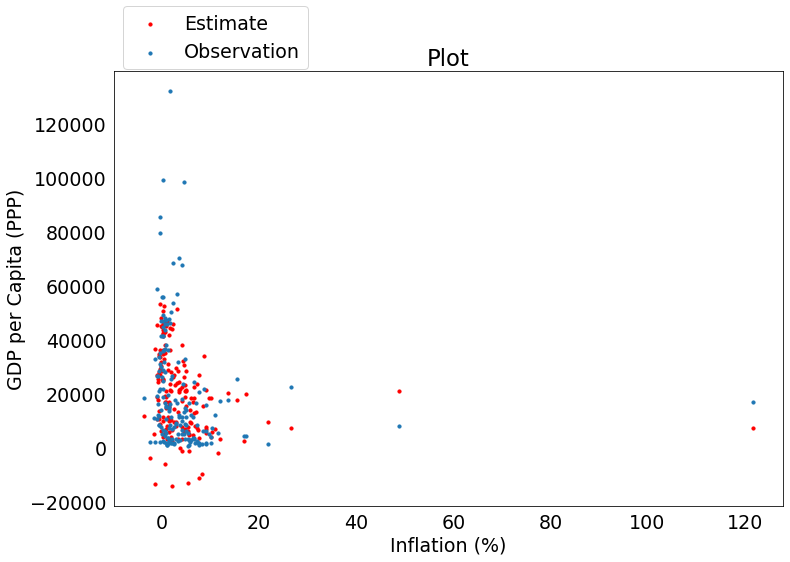

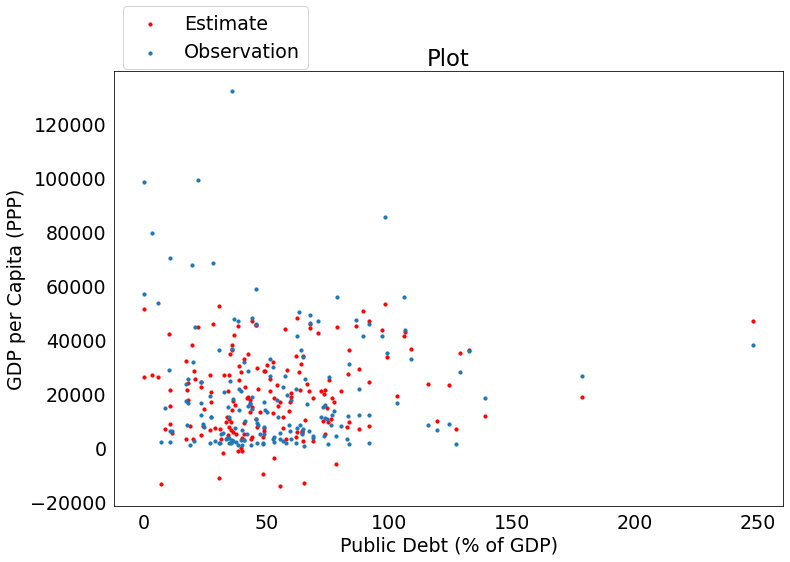

In [31]:
#econFreedomRegression.py
# . . . 
import matplotlib.pyplot as plt

pp = PdfPages("RegressionPlots.pdf")

def plot_scatter_with_estimator(title, data, x_vars, y_var):  
    # set default font size  
    plt.rcParams.update({"font.size": 19})  
    # use a for loop to call each exogenous variable  
    y = y_var[0]  
    for x in x_vars:  
        # prepare a figure with the predictor. We will use ax to specify that  
        # the plots are in the same figure  
        fig, ax = plt.subplots(figsize = (12, 8))  
        # labels will be in a legend  
        y_label1 = "Estimate"  
        y_label2 = "Observation"  
        # plot the estimated value  
        data.plot.scatter(x = x, y = y + " estimator", ax = ax, c = "r",  
                          s = 10, label = y_label1, legend = False)  
        # erase the y-axis label so that "estimator" is not present  
        # the y-label will reappear when the observations are plotted  
        plt.ylabel("")  
        data.plot.scatter(x = x, y = y, ax = ax, s = 10, label = y_label2,  
                          legend = False)  
        # call the legend, place atop the image on the left  
        # bbox_to_anchor used to specify exact placement of label  
        plt.legend(loc = "upper left", labels = [y_label1, y_label2],   
                   bbox_to_anchor = (0, 1.17))  
        plt.title(title)
        # remove lines marking units on the axis  
        ax.xaxis.set_ticks_position('none')  
        ax.yaxis.set_ticks_position('none')  
        
        if pp != None: pp.savefig(fig, bbox_inches = "tight")
        
pp = PdfPages("RegressionPlots.pdf")
plot_scatter_with_estimator("Plot", reg.data, x_vars, y_var)

pp.close()

In [35]:
# from the texbook, calculate the joint F-statistic
# If the p-values associated with this f-statistic indicates statistical significance, t
# hen at least one of the additional variables improve the explanatory power of the regression.
def joint_f_test(self, reg1_name, reg2_name):  
    # identify data for each regression  
    reg1 = self.reg_history[reg1_name]  
    reg2 = self.reg_history[reg2_name]  
    # identify beta estimates for each regression to draw variables  
    reg1_estimates = reg1["Estimates"]          
    reg2_estimates = reg2["Estimates"]  
    # name of y_var is saved as estimates index name  
    reg1_y_name = reg1_estimates.index.name  
    reg2_y_name = reg2_estimates.index.name  
    num_obs1 = reg1["Reg Stats"].loc["Obs."][0]  
    num_obs2 = reg2["Reg Stats"].loc["Obs."][0]  
    # check that the f-stat is measuring restriction, not for diff data sets
    if num_obs1 != num_obs2:   
        self.joint_f_error()  
    if reg1_y_name == reg2_y_name:          
        restr_reg = reg1 if \
            len(reg1_estimates.index) < len(reg2_estimates.index) else reg2 
        unrestr_reg = reg2 if restr_reg is reg1 else reg1  
        restr_var_names = restr_reg["Estimates"].index  
        unrestr_var_names = unrestr_reg["Estimates"].index  
    # identify statistics for each regression  
    restr_reg = restr_reg if False not in \
            [key in unrestr_var_names for key in restr_var_names] else None
    if restr_reg == None:  
        self.joint_f_error()  
    else:  
        sser = restr_reg["Reg Stats"].loc["SSE"][0]  
        sseu = unrestr_reg["Reg Stats"].loc["SSE"][0]  
        dofr = restr_reg["Reg Stats"].loc["DOF"][0]       
        dofu = unrestr_reg["Reg Stats"].loc["DOF"][0]  
        dfn = dofr - dofu  
        dfd = dofu - 1  
        f_stat = ((sser - sseu) / (dfn)) / (sseu / (dfd))  
        f_crit_val = 1 - f.cdf(f_stat,dfn = dfn, dfd = dfd)  
        #make dictionary?  
        f_test_label = ""  
        for key in unrestr_var_names:  
            if key not in restr_var_names:  
                 f_test_label = f_test_label + str(key) + " != "  
        f_test_label = f_test_label + "0"  
        res_dict = {"f-stat":[f_stat],  
                    "p-value":[f_crit_val],  
                    "dfn":[dfn],  
                    "dfd":[dfd]}  
        res_DF = pd.DataFrame(res_dict)  
        res_DF = res_DF.rename(index={0:""})  
        res_DF = res_DF.T  
        res_DF.index.name = f_test_label  

        return res_DF  

def joint_f_error(self):  
        print("Regressions not comparable for joint F-test")  
        return None  

In [34]:
reg = Regression()  

You created an instance of Stats


In [36]:
y_var = ["GDP per Capita (PPP)"]  
x_vars_unrestricted = ["Trade Freedom", "Property Rights", "Inflation (%)",
          "Public Debt (% of GDP)"]  
x_vars_restricted = ["Trade Freedom", "Property Rights", "Inflation (%)"]  
reg.OLS("GDP Per Capita Unrestricted", data, y_var, x_vars_unrestricted)  
reg.OLS("GDP Per Capita Restricted", data, y_var, x_vars_restricted)  
  
joint_f_test = reg.joint_f_test("GDP Per Capita Unrestricted",   
                                "GDP Per Capita Restricted")  
joint_f_test.to_csv("Joint F_test; y = " + reg.y_name[0] + "; " +\
                    joint_f_test.index.name + ".csv")
joint_f_test

,
Public Debt (% of GDP) = 0,
f-stat,6.084743
p-value,0.014645
dfn,1.000000
dfd,167.000000
